# Canada Consumer Price Index

By: Tarun Kataria 

In [31]:
import numpy as np 
import pandas as pd
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
cpi = pd.read_csv("canada_cpi.csv")

In [33]:
cpi.head(10)

,Year,All-items,Food,Shelter,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Gasoline,Health and personal care,"Recreation, education and reading",Alcoholic beverages and tobacco products,All-items excluding food and energy,All-items excluding energy,Fresh fruit and vegetables,Energy,Goods,Services
0,1981,49.5,54.3,50.0,58.6,61.8,45.2,50.9,49.7,46.2,27.8,48.8,50.0,57.2,46.8,53.8,44.9
1,1982,54.9,58.2,56.8,64.8,65.3,51.6,61.8,55.0,50.2,32.1,54.1,54.9,60.7,56.0,58.9,50.7
2,1983,58.1,60.4,60.9,68.3,67.9,54.2,65.6,58.8,53.5,36.1,57.4,58.0,60.7,60.4,62.1,53.9
3,1984,60.6,63.7,63.3,70.5,69.5,56.5,69.4,61.1,55.3,39.1,59.6,60.4,68.6,63.7,64.9,56.0
4,1985,63.0,65.5,65.6,72.3,71.5,59.2,73.5,63.2,57.7,42.8,62.0,62.7,67.6,67.3,67.5,58.2
5,1986,65.6,68.8,67.5,74.5,73.4,61.0,65.4,65.9,60.7,47.9,65.3,65.9,74.3,62.5,69.8,61.2
6,1987,68.5,71.8,70.5,76.7,76.5,63.3,68.5,69.3,63.7,51.1,68.3,68.9,78.1,64.1,72.6,64.1
7,1988,71.2,73.7,73.8,79.6,80.5,64.5,67.9,72.3,67.3,54.9,71.5,71.9,77.7,64.5,75.2,67.1
8,1989,74.8,76.5,78.1,82.5,83.7,67.8,72.1,75.5,70.3,59.9,75.5,75.6,79.1,66.7,78.4,70.9
9,1990,78.4,79.6,82.5,84.2,86.1,71.6,82.7,79.1,73.2,65.2,78.8,78.9,82.1,73.4,81.6,74.9


The Quantitative/Numerical variables is Year and all the items provided in the data such as all-items, Food and shelter
Ordinal Variabls Is the year as years are layed out in order from 1981 to 2018 in the entire dataset
Ordinal data is the CPI scores that are between 40-100

In [34]:
#B) 
pd.DataFrame({'mean' : cpi.mean(),
'Sd' : cpi.std(),
'min' : cpi.min(),
'max' : cpi.max(),
'median' : cpi.median(),
'length' : len(cpi),
'miss.val': cpi.isnull().sum(),
})

,mean,Sd,min,max,median,length,miss.val
Year,1999.500000,11.113055,1981.0,2018.0,1999.50,38,0
All-items,95.144737,23.541243,49.5,133.4,94.15,38,0
Food,98.331579,26.386843,54.3,145.3,92.65,38,0
Shelter,98.652632,25.263720,50.0,140.9,93.95,38,0
"Household operations, furnishings and equipment",95.236842,16.856075,58.6,123.2,96.25,38,0
Clothing and footwear,89.989474,10.919256,61.8,100.7,94.35,38,0
Transportation,94.352632,27.353460,45.2,139.1,94.90,38,0
Gasoline,109.647368,42.183664,50.9,183.8,92.60,38,0
Health and personal care,94.213158,21.328032,49.7,125.9,96.20,38,0
"Recreation, education and reading",88.392105,19.851930,46.2,115.3,95.85,38,0


# C. 
#### i. Which variables have the largest variabilities?
Answer:Gasoline, Alcoholic beverages and tobacco products and Energy have the largest variablities. Data in 'Gasoline' varies from approximately 30 to 185 unit. Data in 'Alcoholic beverages and tobacco' varies from approximately 20 to 170 unit. Data in 'Energy' varies from approximately 20 to 165 unit.

#### ii. Which variables were seen skewed?
Answer: The variables were both positively and negatively skewed. They are listed below:

Positively skewed: All Items 
Foods
Gasoline
Alcoholic beverages and tobacco products
Fresh fruit and vegetables
Energy
All-items excluding energy

Negatively skewed: 
Shelter 
Household operations, furnishings and equipment
Clothing and footwear
Transportation
Health and personal care
Recreation, education and reading
All-items excluding food and energy
Goods


#### iii. Are there any values that seem extreme?
Answer:No, there were no extreme values found in any of the histograms.


<AxesSubplot:>

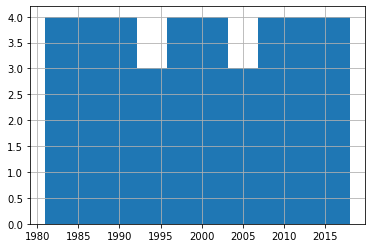

In [35]:
#C)#C) Creating histogrsms for years
cpi['Year'].hist()

<AxesSubplot:>

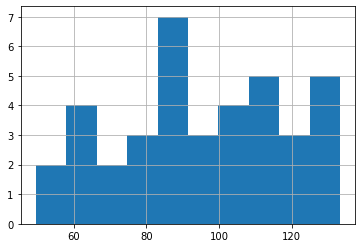

In [36]:
#C) Creating histogrsms for all items
cpi['All-items'].hist()

<AxesSubplot:>

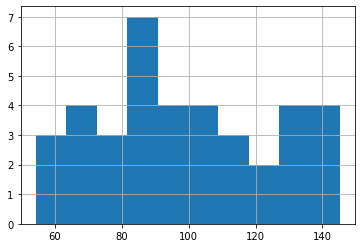

In [37]:
#C) Creating histogrsms for food
cpi['Food'].hist()

<AxesSubplot:>

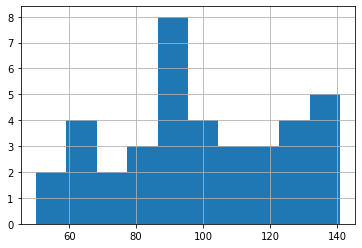

In [38]:
#C) Creating histogrsms for shelter
cpi['Shelter'].hist()

<AxesSubplot:>

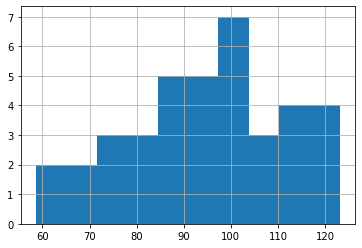

In [39]:
#C) Creating histogrsms for Household operations, furnishings and equipment 
cpi['Household operations, furnishings and equipment'].hist()

<AxesSubplot:>

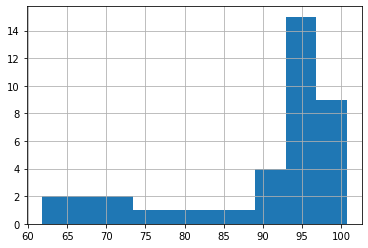

In [40]:
#C) Creating histogrsms for Clothing and footwear
cpi['Clothing and footwear'].hist()

<AxesSubplot:>

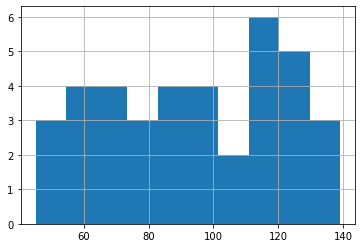

In [41]:
#C) Creating histogrsms for Transportation
cpi['Transportation'].hist()

<AxesSubplot:>

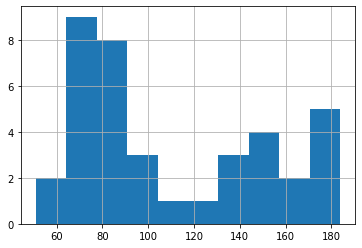

In [42]:
#C) Creating histogrsms for Gasoline
cpi['Gasoline'].hist()

<AxesSubplot:>

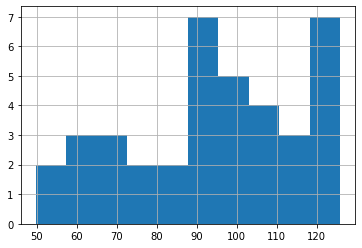

In [43]:
#C) Creating histogrsms for Health and personal care
cpi['Health and personal care'].hist()

<AxesSubplot:>

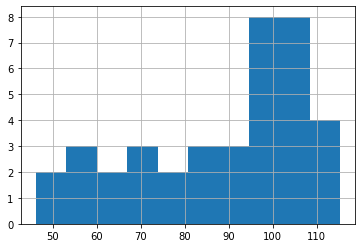

In [44]:
#C) Creating histogrsms for Recreation, education and reading
cpi['Recreation, education and reading'].hist()

<AxesSubplot:>

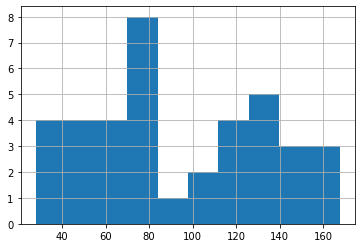

In [45]:
#C) Creating histogrsms for Alcoholic beverages and tobacco products
cpi['Alcoholic beverages and tobacco products'].hist()

<AxesSubplot:>

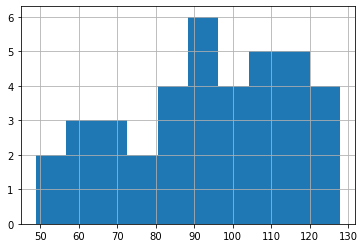

In [46]:
#C) Creating histogrsms for All-items excluding food and energy
cpi['All-items excluding food and energy'].hist()

<AxesSubplot:>

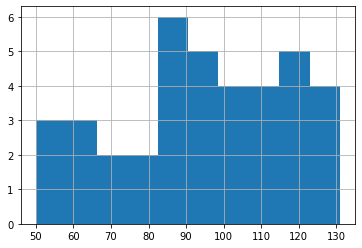

In [47]:
#C) Creating histogrsms for All-items excluding energy
cpi['All-items excluding energy'].hist()

<AxesSubplot:>

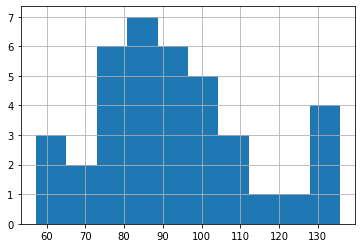

In [48]:
#C) Creating histogrsms for Fresh fruit and vegetables
cpi['Fresh fruit and vegetables'].hist()

<AxesSubplot:>

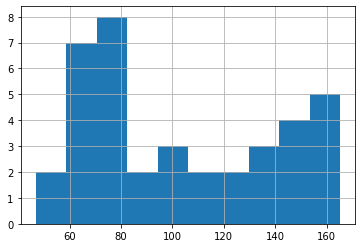

In [49]:
#C) Creating histogrsms for Energy
cpi['Energy'].hist()

<AxesSubplot:>

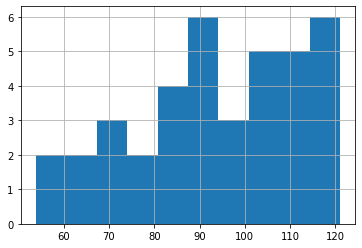

In [50]:
#C) Creating histogrsms for Goods
cpi['Goods'].hist()

<AxesSubplot:>

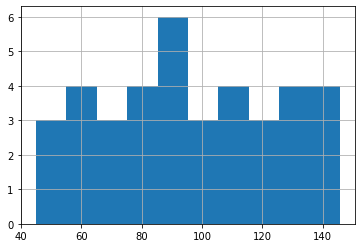

In [51]:
#C) Creating histogrsms for Services
cpi['Services'].hist()

# D. 

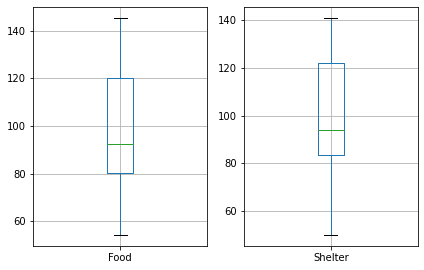

In [52]:
#D)
ig, axes = plt.subplots(nrows = 1, ncols = 2)
cpi.boxplot(column='Food', ax=axes[0])
cpi.boxplot(column='Shelter', ax=axes[1])
plt.suptitle('') # Suppress the overall title
plt.tight_layout() #Increase the separation between the plots

This plot shows us that Food has a lower median value than shelter in the consumer price index. Food cpi is left-skewed while Shelter's CPI is right-skewed. For the box and whiskers, the top quartile of the data for food exceeds the range provided by shelter.  While the bottom quartile is vice versa as the shelter's CPI range is higher than the food's CPI. In the consumer price index, the first 25 percent of shelter's data is more volatile and with lower values than the food's. Therefore the plot shows that the food's cpi range is more volatile and high. This illustrates the price of food having more dramatic increases, and shelter's prices have more dramatic decreases despite having an upward trend in the data.

In [53]:
corr = cpi.corr()
corr

,Year,All-items,Food,Shelter,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Gasoline,Health and personal care,"Recreation, education and reading",Alcoholic beverages and tobacco products,All-items excluding food and energy,All-items excluding energy,Fresh fruit and vegetables,Energy,Goods,Services
Year,1.000000,0.995701,0.991260,0.992346,0.987645,0.667444,0.995014,0.933601,0.986205,0.962644,0.982641,0.988728,0.993447,0.946020,0.968036,0.985586,0.997506
All-items,0.995701,1.000000,0.988266,0.996935,0.994182,0.710931,0.992888,0.925837,0.995467,0.972545,0.983584,0.997068,0.999299,0.948535,0.961120,0.995455,0.998043
Food,0.991260,0.988266,1.000000,0.992703,0.983085,0.610632,0.979374,0.940707,0.974231,0.931149,0.986648,0.975791,0.985068,0.971481,0.968333,0.970613,0.994896
Shelter,0.992346,0.996935,0.992703,1.000000,0.988631,0.673143,0.987267,0.937754,0.988620,0.954091,0.988657,0.990249,0.994890,0.956083,0.968621,0.987889,0.997856
"Household operations, furnishings and equipment",0.987645,0.994182,0.983085,0.988631,1.000000,0.737199,0.979990,0.893442,0.993794,0.975327,0.969071,0.994817,0.996270,0.958614,0.934241,0.991051,0.991414
Clothing and footwear,0.667444,0.710931,0.610632,0.673143,0.737199,1.000000,0.680540,0.456926,0.765219,0.838812,0.612204,0.760596,0.730962,0.592555,0.531441,0.764518,0.672694
Transportation,0.995014,0.992888,0.979374,0.987267,0.979990,0.680540,1.000000,0.944660,0.983986,0.965796,0.975756,0.986884,0.989443,0.920237,0.974361,0.987743,0.991422
Gasoline,0.933601,0.925837,0.940707,0.937754,0.893442,0.456926,0.944660,1.000000,0.898211,0.837325,0.940957,0.898575,0.911664,0.868496,0.991099,0.905194,0.934373
Health and personal care,0.986205,0.995467,0.974231,0.988620,0.993794,0.765219,0.983986,0.898211,1.000000,0.984694,0.967046,0.998523,0.997354,0.934988,0.937770,0.996684,0.989785
"Recreation, education and reading",0.962644,0.972545,0.931149,0.954091,0.975327,0.838812,0.965796,0.837325,0.984694,1.000000,0.925606,0.985630,0.977907,0.885650,0.889230,0.985128,0.959775


<AxesSubplot:>

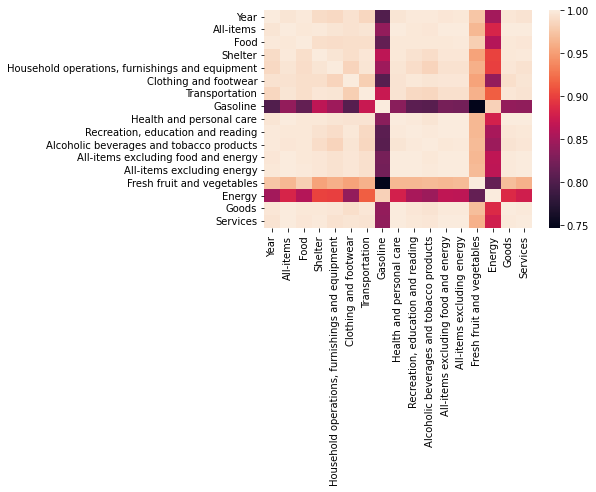

In [54]:
# E) correlation plot
corr = cpi.head(10).corr()
sns.heatmap(corr)

#### Which pair of variables are most strongly correlated?

The pair of variables where the correlation coefficient (r) value is greater than 0.7 are generally considered the most strongly correlated variables. E.g., (Food, Shelter)

#### How can we reduce the number of variables based on these correlations?

we can remove the variables that are highly correlated.

#### How would the correlations change if we normalized the data first?

Normalization does not affect the correlation between variables. They remain exactly the same. The correlation captures the synchronization of the direction of the variables. There is nothing in normalization that does change the direction of the variables.

## PCA

In [55]:
features = ['Gasoline', 'Clothing and footwear']
# Separating out the features
x = cpi.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [56]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

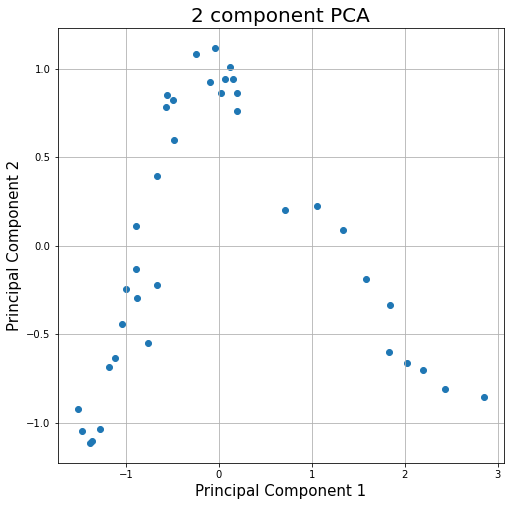

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
ax.grid()

In [58]:
principalDf.tail()

,principal component 1,principal component 2
33,-1.470372,-1.048977
34,-1.045827,-0.440676
35,-0.876416,-0.297516
36,-1.119266,-0.632244
37,-1.516615,-0.924590


In [59]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72846312 0.27153688]


From the above output, we can observe that the principal component 1 holds 72.8% of the information while the principal component 2 holds only 27.2% of the information.